# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def rolling_dice(n):
    """Input (n) is numer of dice rolls
    Output is a list of outcomes of the rolls"""
    l = []
    
    for i in range(n):
        x = random.randrange(1, 6)
        l.append(x)
    
    return l

In [3]:
#test function
dice_rolls = rolling_dice(10)
dice_rolls

[1, 5, 2, 4, 1, 5, 1, 5, 4, 1]

In [4]:
#store in df
df = pd.DataFrame(dice_rolls,columns=['Outcome_dice_roll'])
df

,Outcome_dice_roll
0,1
1,5
2,2
3,4
4,1
5,5
6,1
7,5
8,4
9,1


#### 2.- Plot the results sorted by value.

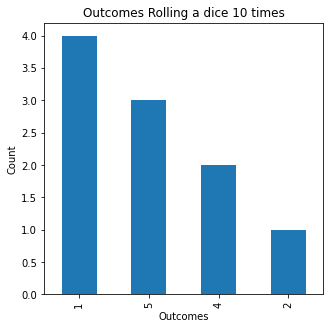

In [5]:
# your code here
# Create a figure of a fixed size
plt.figure(figsize=(5,5))

# plot
df['Outcome_dice_roll'].value_counts().plot(kind='bar');

#Labels
plt.title('Outcomes Rolling a dice 10 times')
plt.xlabel('Outcomes')
plt.ylabel('Count')

# Show the plot
plt.show()
#paolo: good start but you should plot per per dice roll- so on x axis
# you should have the roll index 

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

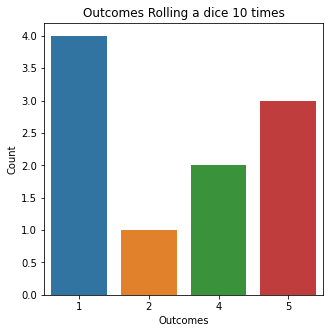

In [10]:
# your code here
# Create a figure of a fixed size
plt.figure(figsize=(5,5))

# plot
sns.countplot(data=df, x="Outcome_dice_roll")

#Labels
plt.title('Outcomes Rolling a dice 10 times')
plt.xlabel('Outcomes')
plt.ylabel('Count')

# Show the plot
plt.show()
#paolo: yes! you can also use an histogramme instead of countplot

In [7]:
"""
your comments here

It is the same plot, but the value outcomes aren't sorted by count, but from 1 - 6 (possible outcomes).
"""

"\nyour comments here\n\nIt is the same plot, but the value outcomes aren't sorted by count, but from 1 - 6 (possible outcomes).\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
def mean_method1(x):
    """Input is a list of observations
    Output is the mean of observations (sum divided by length)"""
    return float(sum(x) / len(x))
#paolo: great that you use doc strings!

In [12]:
#test function
print(sum(dice_rolls))
mean(dice_rolls)
#paolo: this cell gives error

29


NameError: name 'mean' is not defined

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [13]:
# your code here
def mean_method2(df, column):
    """Input is a series/column of a dataframe
    Output is the mean of observations"""
    
    values_df = df[column].value_counts()
    frequency = values_df.values
    dice_value = values_df.index
    return float(sum(dice_value * frequency) / len(df[column]))

In [14]:
#test function
print(sum(dice_rolls))
mean_method2(df, 'Outcome_dice_roll')

29


2.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [15]:
# your code here
def median_method1(df, column):
    length_column = len(df[column])
    df = df.sort_values(column)
    
    if length_column % 2 != 0:
        index = int((length_column / 2) - 0.5)
        return df[column].iloc[index]
    
    elif length_column % 2 == 0:
        index1 = int((length_column / 2))
        index2 = int(index1 - 1)
        x = df[column].iloc[index1]
        y = df[column].iloc[index2]
        return (x + y) / 2

In [16]:
#test
median_method1(df,'Outcome_dice_roll')

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [17]:
# your code here
def quartiles(df,column):
    Q2 = median_method1(df,column)
    Q4 = df[column].max()
    
    length_column = len(df[column])
    df = df.sort_values(column)
    
    if length_column % 2 != 0:
        index = int((length_column / 2) - 0.5)
        lower_range = df.iloc[0:index]
        upper_range = df.iloc[index:]
        
        Q1 = median_method1(lower_range, column)
        Q3 = median_method1(upper_range, column)
    
    elif length_column % 2 == 0:
        index = int(((length_column / 2)) -1)
        lower_range = df.iloc[0:index]
        upper_range = df.iloc[index:]
        
        Q1 = median_method1(lower_range, column)
        Q3 = median_method1(upper_range, column)

    return Q1, Q2, Q3, Q4

In [45]:
#test
quartiles(df,'Outcome_dice_roll')
#paolo: good that you test- you could use python's builtin functions to calculate quartiles and comapre it to the results of your
#function

(1.0, 3.0, 4.5, 5)

In [48]:
#paolo: check with builtin function
df.quantile([0.25, 0.5, 0.75, 1], interpolation='midpoint')
#paolo: notice that the results can differ according to the interpolation method you use. There are a few accepted ways to calculate
# quantiles that can lead to different result.

,Outcome_dice_roll
0.25,1.0
0.50,3.0
0.75,4.5
1.00,5.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

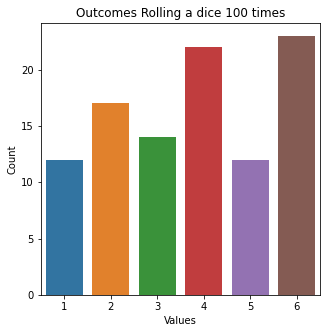

In [19]:
# your code here
#load csv
roll_the_dice_hundred = pd.read_csv('..\\data\\roll_the_dice_hundred.csv')

#sort values
roll_the_dice_hundred.sort_values('value')

# Create a figure of a fixed size
plt.figure(figsize=(5,5))

# plot
sns.countplot(data=roll_the_dice_hundred, x="value")

#Labels
plt.title('Outcomes Rolling a dice 100 times')
plt.xlabel('Values')
plt.ylabel('Count')

# Show the plot
plt.show()
#paolo: same as first question- so orderered by dice roll
# this is the standard histogramme

In [20]:
"""
The outcomes are not evenly distributed over the six possible outcomes.
"""

'\nThe outcomes are not evenly distributed over the six possible outcomes.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [22]:
# your code here
mean_method2(roll_the_dice_hundred, 'value')

3.74

#### 3.- Now, calculate the frequency distribution.


In [23]:
# your code here
values_df = roll_the_dice_hundred['value'].value_counts()
frequency = values_df.values
frequency

array([23, 22, 17, 14, 12, 12], dtype=int64)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value'>

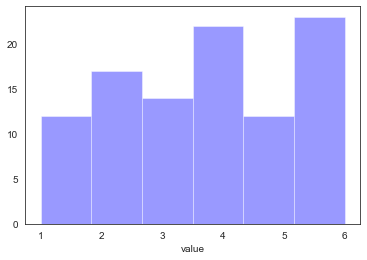

In [24]:
# your code here
sns.set_style("white")
plt.plot(figsize=(15,5))
sns.distplot(roll_the_dice_hundred['value'], kde=False, color='blue', bins=6)
#paolo: yes I find this a betetr histogramme, with same color across

In [ ]:
"""
your comments here
The outcomes are not evenly distributed over the six possible outcomes. 
The outcomes are slightly left skewed. The mean is also right from the middle.
"""

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:xlabel='value'>

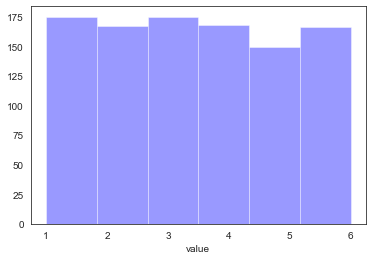

In [25]:
# your code here
#load csv
roll_the_dice_thousand = pd.read_csv('..\\data\\roll_the_dice_thousand.csv')

# your code here
sns.set_style("white")
plt.plot(figsize=(15,5))
sns.distplot(roll_the_dice_thousand['value'], kde=False, color='blue', bins=6)

In [ ]:
"""
your comments here
The outcomes are way more evenly distributed. That makes sense because the 
set is way larger.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

<AxesSubplot:xlabel='observation'>

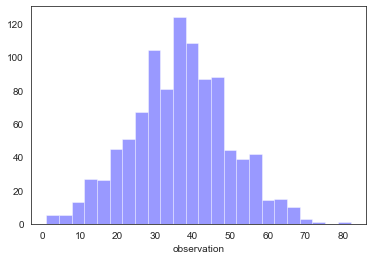

In [26]:
# your code here
#load csv
ages_population = pd.read_csv('..\\data\\ages_population.csv')

# your code here
sns.set_style("white")
plt.plot(figsize=(15,5))
sns.distplot(ages_population['observation'], kde=False, color='blue')

#My guess is mean is around 40 years old.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [27]:
# your code here
mean_method2(ages_population, 'observation')

ages_population['observation'].std()

12.816499625976762

In [ ]:
"""
your comments here
I was relatively close to the mean. Standard deviation, I had no clue. So 
didn't guess that right.
"""
#paolo: good work- the more distributions you will see the more intuition you will develop for standard deviation

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

<AxesSubplot:xlabel='observation'>

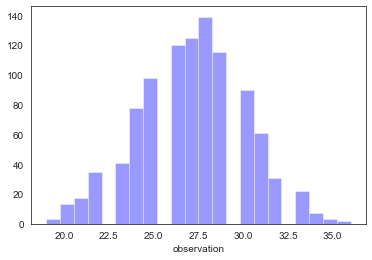

In [28]:
# your code here
#load csv
ages_population2 = pd.read_csv('..\\data\\ages_population2.csv')

# your code here
sns.set_style("white")
plt.plot(figsize=(15,5))
sns.distplot(ages_population2['observation'], kde=False, color='blue')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [29]:
"""
your comments here
There are blanc spots in de frequency distribution.
"""
#paolo: what about the spread in ages compared to previous distribution?

'\nyour comments here\nThere are blanc spots in de frequency distribution.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [30]:
# your code here
mean_method2(ages_population2, 'observation')

27.155

In [31]:
#standard deviation
ages_population2['observation'].std()

2.969813932689186

In [32]:
"""
your comments here 
Standard deviation is a lot lower. Which means that the frequency distribution
is more evenly distributed.
"""

'\nyour comments here \nStandard deviation is a lot lower. Which means that the frequency distribution\nis more evenly distributed.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

<AxesSubplot:xlabel='observation'>

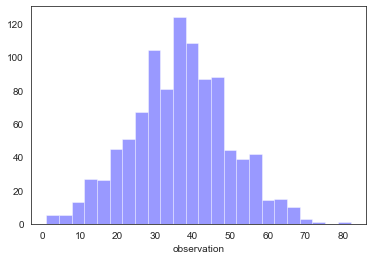

In [33]:
# your code here
#load csv
ages_population3 = pd.read_csv('..\\data\\ages_population3.csv')

# your code here
sns.set_style("white")
plt.plot(figsize=(15,5))
sns.distplot(ages_population['observation'], kde=False, color='blue')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [34]:
# mean
mean_method2(ages_population3, 'observation')

41.989

In [35]:
#standard deviation
ages_population3['observation'].std()

16.144705959865934

In [ ]:
"""
your comments here
Mean is closer to the first file, but the std deviation is lower. Which means
less dispersed data.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [36]:
# your code here
quartiles(ages_population3,'observation')

(30.0, 40.0, 53.0, 77.0)

In [38]:
"""
your comments here
Median and mean are close to each other. That's a sign the data is relatively
evenly distributed.
"""

"\nyour comments here\nMedian and mean are close to each other. That's a sign the data is relatively\nevenly distributed.\n"

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [39]:
# your code here


In [40]:
"""
your comments here
I'm not sure what kind of percentiles I should think of.
"""
#paolo: I refer you to the solution for possible examples

"\nyour comments here\nI'm not sure what kind of percentiles I should think of.\n"

In [ ]:
#paolo check ok good work-have a look at comments

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""